In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../Data/t-shirts.csv')

print(df.describe())
print(df.info())

         size material  color sleeves demand
count   20000    20000  20000   20000  20000
unique      7        5     10       2      3
top         L    nylon  white    long   high
freq     4408     5652   3286   10117   8965
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   size      20000 non-null  object
 1   material  20000 non-null  object
 2   color     20000 non-null  object
 3   sleeves   20000 non-null  object
 4   demand    20000 non-null  object
dtypes: object(5)
memory usage: 781.4+ KB
None


In [7]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

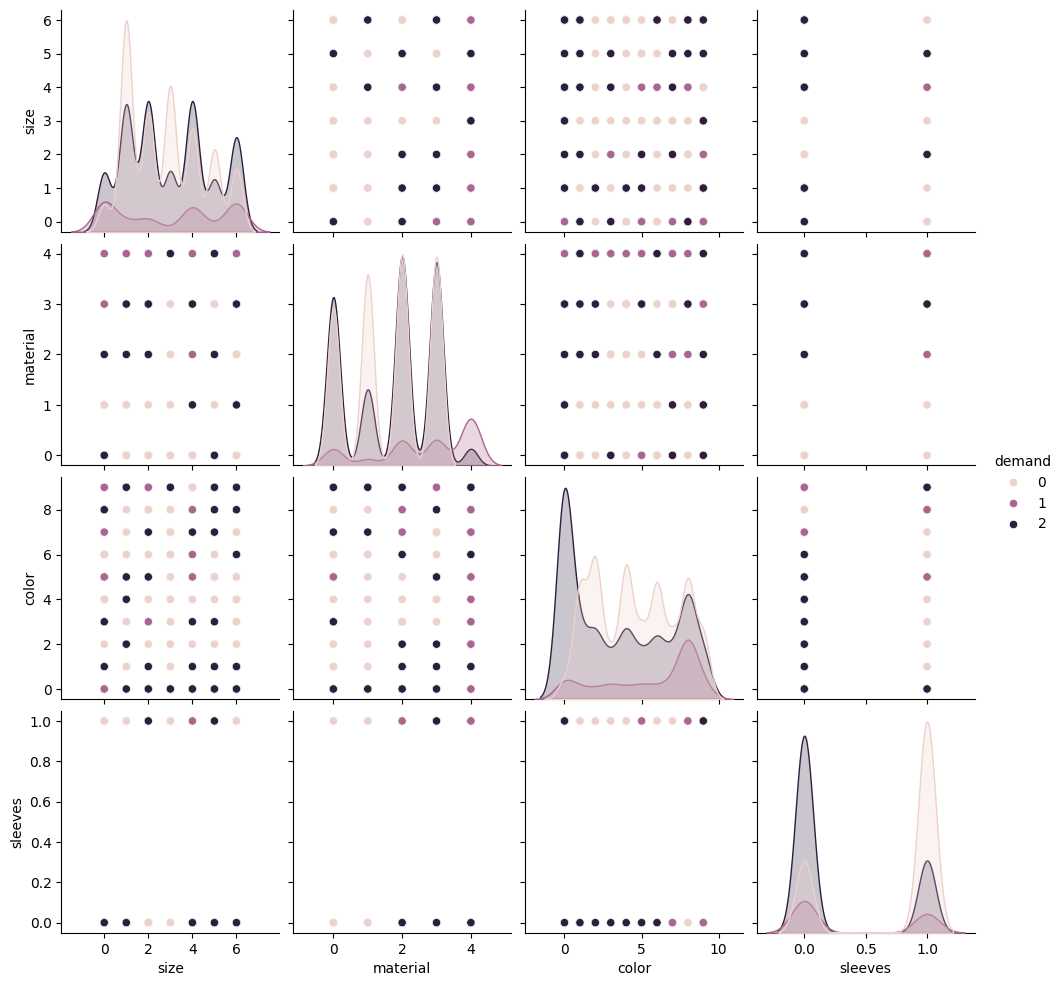

In [8]:
sns.pairplot(df, hue='demand')
plt.show()

In [9]:
X = df.drop('demand', axis=1)
y = df['demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scalers = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler()
}
pca = PCA(n_components=2)
selectors = SelectKBest(chi2, k=2)

In [11]:
X_train_standard = scalers['standard'].fit_transform(X_train)
X_test_standard = scalers['standard'].transform(X_test)

X_train_minmax = scalers['minmax'].fit_transform(X_train)
X_test_minmax = scalers['minmax'].transform(X_test)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_select = selectors.fit_transform(X_train, y_train)
X_test_select = selectors.transform(X_test)

In [12]:
classifiers = {
    'naive_bayes': GaussianNB(),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'svm': SVC()
}

In [13]:
results = {}

for name, clf in classifiers.items():
    clf.fit(X_train_standard, y_train)
    y_pred = clf.predict(X_test_standard)
    results[name] = classification_report(y_test, y_pred, output_dict=True)

In [14]:
for name, result in results.items():
    print(f'Classifier: {name}')
    print(pd.DataFrame(result).transpose())

Classifier: naive_bayes
              precision    recall  f1-score     support
0              0.688990  0.753189  0.719661  1803.00000
1              0.850000  0.074398  0.136821   457.00000
2              0.643037  0.735057  0.685975  1740.00000
accuracy       0.667750  0.667750  0.667750     0.66775
macro avg      0.727342  0.520882  0.514152  4000.00000
weighted avg   0.687396  0.667750  0.638418  4000.00000
Classifier: decision_tree
              precision    recall  f1-score   support
0              0.982892  0.987798  0.985339  1803.000
1              0.948198  0.921225  0.934517   457.000
2              0.966743  0.968966  0.967853  1740.000
accuracy       0.972000  0.972000  0.972000     0.972
macro avg      0.965944  0.959330  0.962570  4000.000
weighted avg   0.971903  0.972000  0.971926  4000.000
Classifier: random_forest
              precision    recall  f1-score   support
0              0.982892  0.987798  0.985339  1803.000
1              0.949772  0.910284  0.929609   